<a href="https://colab.research.google.com/github/Sarthak81/Face-Mask-Detector/blob/main/maskDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/train/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset/train/train/with_mask',
 '/content/drive/MyDrive/Dataset/train/train/without_mask']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='sigmoid')(x)


model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16)

Found 1315 images belonging to 2 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16)

Found 194 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10
  )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
83/83 [==============================] - 718s 8s/step - loss: 0.5209 - accuracy: 0.9304 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 2/10
83/83 [==============================] - 27s 324ms/step - loss: 0.0575 - accuracy: 0.9897 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/10
83/83 [==============================] - 27s 322ms/step - loss: 0.0253 - accuracy: 0.9982 - val_loss: 0.0479 - val_accuracy: 0.9948
Epoch 4/10
83/83 [==============================] - 27s 325ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9948
Epoch 5/10
83/83 [==============================] - 26s 318ms/step - loss: 0.0114 - accuracy: 0.9982 - val_loss: 0.0724 - val_accuracy: 0.9897
Epoch 6/10
83/83 [==============================] - 26s 317ms/step - loss: 0.0500 - accuracy: 0.9952 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 7/10
83/83 [==============================] - 27s 323ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 1.0000
E

In [ ]:
import matplotlib.pyplot as plt

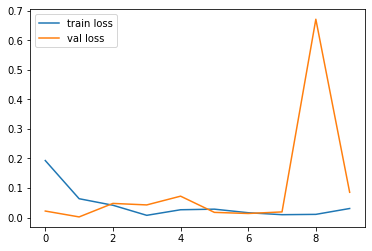

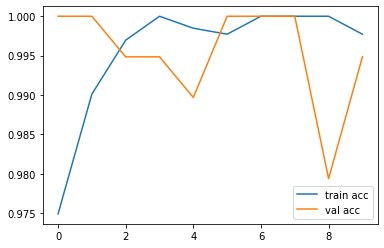

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[4.4819551e-11, 1.0000000e+00],
       [1.9706431e-30, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [3.0766319e-07, 8.4767449e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [2.9360198e-34, 1.0000000e+00],
       [1.0000000e+00, 7.1421322e-37],
       [1.0000000e+00, 1.7401395e-25],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.7920967e-21],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [5.8572729e-24, 1.0000000e+00],
       [7.5466822e-20, 1.0000000e+00],
       [2.3376579e-05, 9.9996579e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [2.9374800e-24, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [2.2331214e-01, 2.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
model=load_model('model_inception.h5')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


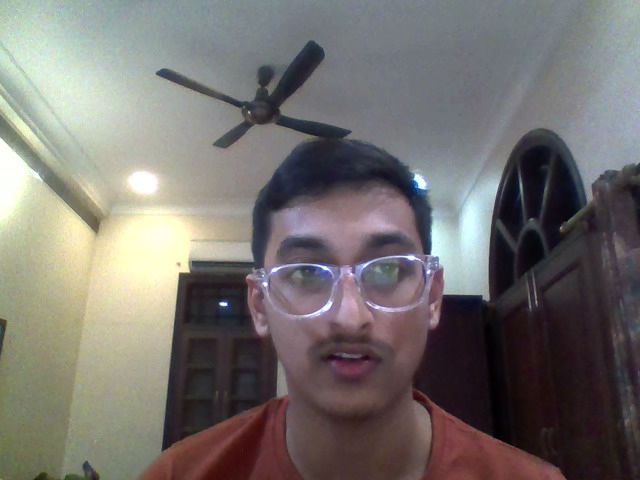

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
img=image.load_img('/content/drive/MyDrive/Mask test/noMask.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[202., 192., 191.],
        [201., 191., 190.],
        [201., 193., 190.],
        ...,
        [237., 226., 220.],
        [237., 224., 218.],
        [236., 226., 217.]],

       [[202., 192., 191.],
        [200., 192., 189.],
        [202., 194., 191.],
        ...,
        [235., 224., 218.],
        [234., 223., 217.],
        [235., 224., 218.]],

       [[201., 191., 189.],
        [201., 191., 189.],
        [201., 193., 190.],
        ...,
        [233., 224., 217.],
        [234., 225., 218.],
        [234., 223., 217.]],

       ...,

       [[151.,  85.,  27.],
        [161.,  96.,  38.],
        [158.,  93.,  37.],
        ...,
        [166., 157., 152.],
        [165., 157., 154.],
        [165., 158., 152.]],

       [[162.,  92.,  30.],
        [160.,  94.,  34.],
        [165.,  96.,  37.],
        ...,
        [169., 160., 155.],
        [168., 159., 154.],
        [166., 158., 155.]],

       [[167., 100.,  29.],
        [169., 104.,  38.],
        [168., 1

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
img_data

array([[[[-0.993787  , -0.99409455, -0.99412537],
         [-0.99381775, -0.99412537, -0.9941561 ],
         [-0.99381775, -0.9940638 , -0.9941561 ],
         ...,
         [-0.9927105 , -0.99304885, -0.9932334 ],
         [-0.9927105 , -0.99311036, -0.9932949 ],
         [-0.9927412 , -0.99304885, -0.99332565]],

        [[-0.993787  , -0.99409455, -0.99412537],
         [-0.9938485 , -0.99409455, -0.9941869 ],
         [-0.993787  , -0.99403304, -0.99412537],
         ...,
         [-0.992772  , -0.99311036, -0.9932949 ],
         [-0.99280274, -0.9931411 , -0.99332565],
         [-0.992772  , -0.99311036, -0.9932949 ]],

        [[-0.99381775, -0.99412537, -0.9941869 ],
         [-0.99381775, -0.99412537, -0.9941869 ],
         [-0.99381775, -0.9940638 , -0.9941561 ],
         ...,
         [-0.99283355, -0.99311036, -0.99332565],
         [-0.99280274, -0.9930796 , -0.9932949 ],
         [-0.99280274, -0.9931411 , -0.99332565]],

        ...,

        [[-0.9953556 , -0.9973856 , -0

In [ ]:
model.predict(img_data)

array([[0.59558815, 0.14531475]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==0

array([ True])